In [34]:
import cv2
import matplotlib.pyplot as plt
from img_util import imshow
import skimage
import numpy as np


In [16]:
sift_d = cv2.SIFT_create() #scale invarient feature transform
orb_d = cv2.ORB_create()  #Oriented fast and Rotated Brief
surf_d = cv2.xfeatures2d.SURF()  #Speed up robust Features

In [13]:
cat1 = cv2.imread('cat.jpg')
cat3 = cv2.imread('cat3.jpeg')

dog1 = cv2.imread('dog.jpg')
dog2 = cv2.imread('dog2.png')
dog3 = cv2.imread('dog3.png')

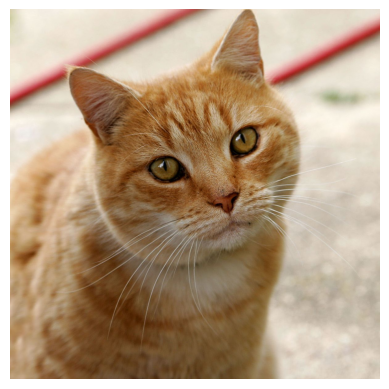

In [14]:
imshow(cat3)


In [17]:
def detectAndCompute(detector, images):
    kps=[]
    des=[]

    for img in images:
        keypoint, descriptor = detector.detectAndCompute(img, None)
        kps.append(keypoint)
        des.append(descriptor)
    return kps,des

images =[cat1,cat3,dog1,dog2,dog3]
sift_kp, sift_des = detectAndCompute(sift_d,images)
orb_kp, orb_des = detectAndCompute(orb_d,images)

In [19]:
for kp in sift_kp:
    print(len(kp))
print('.....')
for kp in orb_kp:
    print(len(kp))

1349
1734
555
5799
626
.....
500
500
500
500
500


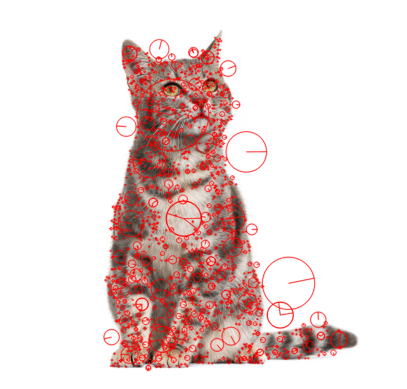

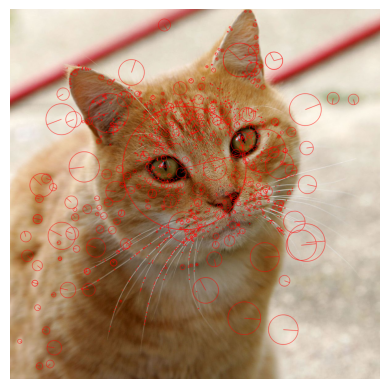

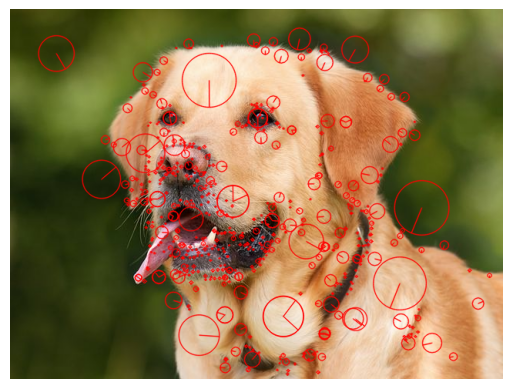

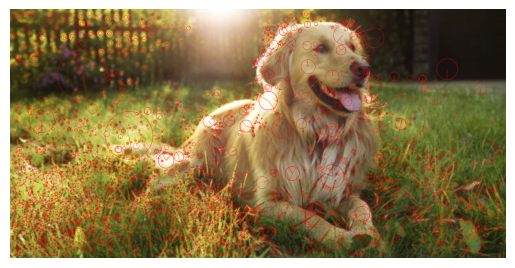

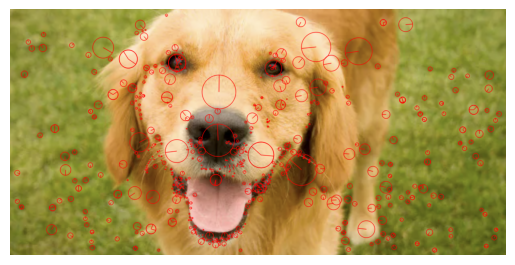

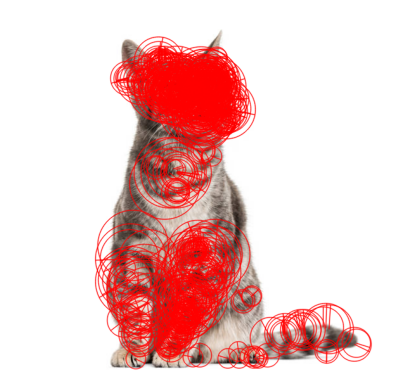

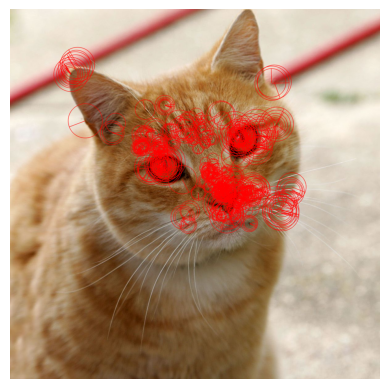

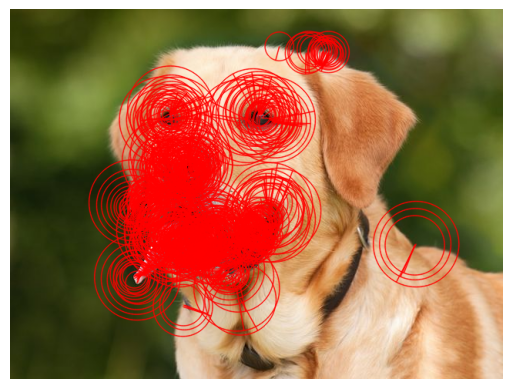

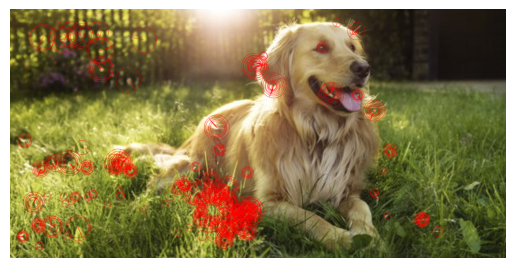

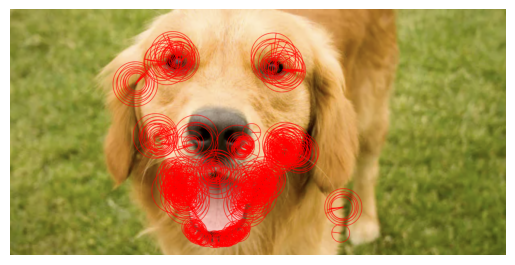

In [20]:
def drawKeypoints(img, kp):
    img_kp = cv2.drawKeypoints(
        img,kp,0,(0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    imshow(img_kp)
    plt.show()

for img,kp in zip(images,sift_kp):
    drawKeypoints(img,kp)
for img,kp in zip(images,orb_kp):
    drawKeypoints(img,kp)

In [23]:
matcher = cv2.BFMatcher()


In [38]:
def compare_des(query, descs):
    results =[]
    for des in descs:
        matches = matcher.match(query,des)
        matches = [val.distance for val in matches]
        mean = np.mean(matches)
        results.append(mean)

        
    return results

sift_res = compare_des(sift_des[-1],sift_des[:-1])
orb_res = compare_des(orb_des[-1],orb_des[:-1])




In [41]:
labels = ['cat','cat','dog','dog']
prediction = labels[sift_res.index(min(sift_res))]
print(prediction)

dog
